# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
df_orders = pd.read_csv("/datasets/instacart_orders.csv", sep=";")
df_products = pd.read_csv("/datasets/products.csv", sep=";")
df_aisles = pd.read_csv("/datasets/aisles.csv", sep=";")
df_departments = pd.read_csv("/datasets/departments.csv", sep=";")
df_order_products = pd.read_csv("/datasets/order_products.csv", sep=";")

In [3]:
# mostrar información del DataFrame
df_orders.info()
print()
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
# mostrar información del DataFrame
df_products.info()
print()
df_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# mostrar información del DataFrame
df_aisles.info()
print()
df_aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB



,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
# mostrar información del DataFrame
df_departments.info()
print()
df_departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes



,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
# mostrar información del DataFrame
df_order_products.info()
print()
df_order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB



,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


## Conclusiones

El primer DataFrame (órdenes de compra) consta de 478,967 filas y seis columnas, de las cuales cinco del tipo de datos entero y una del tipo flotante. Se observan valores ausentes en una de las seis columnas, empero estos valores son mínimos comparados con las filas del DataFrame.

El segundo DataFrame (productos) consta de 49694 filas y cuatro columnas, de las cuales tres del tipo de datos entero y una del tipo objeto. No hay presencia de valores ausentes en ninguna de las cuatro columnas.

El tercer Dataframe (pasillos) consta de 134 filas y dos columnas, de las cuales una es de tipo de datos entero y la otra del tipo objeto. No hay presencia de valores ausentes en ninguna de las dos columnas.

El cuarto DataFrame (departamentos) consta de 21 filas y dos columnas, de las cuales una es del tipo de datos entero y la otra del tipo objeto. No hay presencia de valores ausentes en ninguna de las dos columnas.

El quinto DataFrame (artículos de un pedido) consta de 4,545,007 filas y 4 columnas, de las cuales tres son del tipo de datos entero y una del tipo flotante. No hay presencia de valores ausentes en ninguna de las cuatro columnas.

En conclusión, las bases de datos están completas (salvo una donde los valores ausentes son mínimos en una columna), por lo que en primera instancia la información es apropiada para poder trabajar con ella. Es importante realizar una exploración más profunda de los datos para encontrar errores más puntuales, lo cual se realizará en la siguiente etapa de este proyecto.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(df_orders.duplicated().sum())
print()
df_orders[df_orders.duplicated()]

15



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Se observan 15 duplicados, al parecer todos los duplicados coinciden en el mismo día y hora realizadas. 

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(df_orders[(df_orders["order_dow"]==3)&(df_orders["order_hour_of_day"]==2)])
print()
print(df_orders[(df_orders["order_dow"]==3)&(df_orders["order_hour_of_day"]==2)].duplicated().sum())
print()
print("El " + str((15/121)*100) + "% de los pedidos de los miércoles a las 2 de la mañana son duplicados.")

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

Se confirma que los duplicados son de pedidos del día miéroles a las 2 de la mañana. Sin embargo, solo el 12.3966% de los pedidos que fueron realizados en ese horario son duplicados. 

In [10]:
# Elimina los pedidos duplicados
df_orders = df_orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(df_orders.duplicated().sum())

0


In [12]:
# Vuelve a verificar si hay IDs duplicados de pedidos
print(df_orders["order_id"].nunique())
print()
print(df_orders["order_id"].value_counts().sort_values())

478952

1048576    1
1073164    1
1079311    1
2129936    1
402526     1
          ..
2117923    1
2197455    1
1152973    1
47081      1
2047       1
Name: order_id, Length: 478952, dtype: int64


Se observaron 15 ordenes duplicadas en el DataFrame de instacart_orders. Todos coinidieron en que fueron pedidos del día miercoles a las 2 de la mañana. Se utilizó el metodo drop_duplicates() para eliminarlos. 

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(df_products.duplicated().sum())

0


In [14]:
# Verifica si hay IDs duplicadas de productos
print(df_products["product_id"].nunique())
print()
print(df_products["product_id"].value_counts().sort_values())

49694

2049     1
32       1
49176    1
24588    1
6147     1
        ..
10235    1
8188     1
6141     1
1983     1
2047     1
Name: product_id, Length: 49694, dtype: int64


In [15]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products["product_name"] = df_products["product_name"].str.upper()
print(df_products["product_name"].duplicated().sum())

1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products["product_name"].value_counts()
    

GREEN TEA WITH GINSENG AND HONEY                                        3
PROACTIVE HEALTH INDOOR WEIGHT & HAIRBALL CARE WITH CHICKEN CAT FOOD    2
COSMIC BROWNIES WITH CHOCOLATE CHIP CANDY                               2
FIRE ROASTED DICED TOMATOES WITH GARLIC                                 2
SPREADABLE BUTTER WITH CANOLA OIL                                       2
                                                                       ..
KIDS STRAWBERRY BANANA LOW-FAT YOGURT 25% LESS SUGAR                    1
ORIGINAL ROASTED & SALTED SUNFLOWER SEEDS                               1
PIBB XTRA SODA                                                          1
VANILLA CRISP ENERGY BAR                                                1
STAR WARS MACARONI & CHEESE                                             1
Name: product_name, Length: 48332, dtype: int64

No se observaron filas duplicadas en el DataFrame de products. Sin embargo, se observaron 1,361 nombres duplicados en la columna de product_name. Esto se debe a que hay productos registrados con dos o más IDs. Para observar esto, se transformaron todos los nombres de los productos a mayúsculas, ya que habia disparidad en la sintaxis de los productos.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(df_departments.duplicated().sum())

0


In [18]:
# Revisa si hay IDs duplicadas de productos
print(df_departments["department_id"].nunique())
print()
print(df_departments["department_id"].value_counts())

21

1     1
12    1
20    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
11    1
2     1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
21    1
Name: department_id, dtype: int64


No se observan duplicados en el DataFrame de departments.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(df_aisles.duplicated().sum())

0


In [20]:
# Revisa si hay IDs duplicadas de productos
print(df_aisles["aisle_id"].nunique())
print()
print(df_aisles["aisle_id"].value_counts().sort_values())

134

1      1
5      1
6      1
7      1
8      1
      ..
132    1
133    1
119    1
120    1
134    1
Name: aisle_id, Length: 134, dtype: int64


No se observan duplicados en el DataFrame de aisles.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(df_order_products.duplicated().sum())

0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(df_order_products["order_id"].nunique())
print()
print(df_order_products["order_id"].value_counts())
print()
df_order_products[df_order_products["order_id"].duplicated()].sort_values("order_id")

450046

61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
54659        1
210431       1
1717983      1
1136563      1
8196         1
Name: order_id, Length: 450046, dtype: int64



,order_id,product_id,add_to_cart_order,reordered
2834230,4,26434,2.0,1
1420535,4,10054,5.0,1
2507695,4,17616,10.0,1
1295279,4,39758,3.0,1
1299531,4,32645,12.0,1
...,...,...,...,...
1718460,3421071,21791,2.0,0
1692878,3421071,32293,4.0,1
1505667,3421077,27966,1.0,0
4417991,3421077,45007,2.0,0


Se observan varios duplicados en la columna order_id del DataFrame order_products. Sin embargo, es normal ya que indica que se agregaron múltiples artículos a las órdenes de compra.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df_products["product_name"].isna().sum())

1258


Existen 1,258 valores ausentes en la columna product_name del DataFrame products

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(df_products[df_products["product_name"].isna()]["aisle_id"])

37       100
71       100
109      100
296      100
416      100
        ... 
49552    100
49574    100
49640    100
49663    100
49668    100
Name: aisle_id, Length: 1258, dtype: int64


Todos los valores ausentes de la columna product_name están relacionados con el pasillo con ID 100.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_products[df_products["product_name"].isna()]["department_id"])

37       21
71       21
109      21
296      21
416      21
         ..
49552    21
49574    21
49640    21
49663    21
49668    21
Name: department_id, Length: 1258, dtype: int64


De igual manera, todos los valores ausentes de la columna product_name estan relacionados en el departamento con ID 21.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_products[df_products["product_name"].isna()][["aisle_id","department_id"]])

       aisle_id  department_id
37          100             21
71          100             21
109         100             21
296         100             21
416         100             21
...         ...            ...
49552       100             21
49574       100             21
49640       100             21
49663       100             21
49668       100             21

[1258 rows x 2 columns]


Efectivamente, los datos ausentes estan presentes en el pasillo con ID 100 y el departamento con ID 21.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products["product_name"] = df_products["product_name"].fillna("Unknown")
print()
print(df_products[df_products["product_name"]=="Unknown"][["aisle_id","department_id"]])


       aisle_id  department_id
37          100             21
71          100             21
109         100             21
296         100             21
416         100             21
...         ...            ...
49552       100             21
49574       100             21
49640       100             21
49663       100             21
49668       100             21

[1258 rows x 2 columns]


Se encontraron 1,258 valores ausentes en la columna product_name. Para poder trabajar con la base de datos de manera efectiva, se optó por establecer todos estos productos con la etiqueta "unknown".

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(df_orders["days_since_prior_order"].isna().sum())

28817


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
df_orders[df_orders["days_since_prior_order"]!=0]["user_id"].isna().sum()

0

No se observan valores ausentes que no sean primeros pedidos del cliente. Para corroborar esto, se filtró la columna user_id cuando el valor en la columna days_since_prior_order es diferente a cero.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
print(df_order_products["add_to_cart_order"].isna().sum())

836


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("El valor mínimo de la columna es: " + str(df_order_products["add_to_cart_order"].min()))
print()
print("El valor máximo de la columna es: " + str(df_order_products["add_to_cart_order"].max()))

El valor mínimo de la columna es: 1.0

El valor máximo de la columna es: 64.0


Se encontraron 836 valores ausentes en la columna "add_to_cart_order" del DataSet order_products. Tambien se encontró que el valor mínimo de la columna es 1 (lo cual es lógico ya que un pedido consta de mínimo un artículo agregado) y el valor máximo es 64.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
id_con_valores_ausentes = df_order_products[df_order_products["add_to_cart_order"].isna()]["order_id"]

In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print(df_order_products[df_order_products["order_id"].isin(id_con_valores_ausentes)]["product_id"].value_counts())
print()
#print("El valor mínimo del conteo en el número de product_id en cada pedido es: " + str(df_order_products[df_order_products["order_id"].isin(id_con_valores_ausentes)]["product_id"].min()))
print("El valor mínimo del conteo en el número de product_id en cada pedido es: " + str(df_order_products[df_order_products['order_id'].isin(id_con_valores_ausentes)].groupby(['order_id'])['product_id'].count().min()))

13176    25
21137    21
24852    20
27966    20
26209    18
         ..
9493      1
40214     1
25885     1
25466     1
12260     1
Name: product_id, Length: 3039, dtype: int64

El valor mínimo del conteo en el número de product_id en cada pedido es: 65


In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products["add_to_cart_order"] = df_order_products["add_to_cart_order"].fillna(999)
df_order_products["add_to_cart_order"] = df_order_products["add_to_cart_order"].astype("int")
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


## Conclusiones

Para limpiar las bases de datos se realizaron dos procesos. Por un lado se verificó que no hubiera presencia de duplicados, tanto explicitos como implícitos, y en caso de haberlos, verificar si eran normales o un error en la base de datos. Por otro lado, se buscó la presencia de valores ausentes en los datos, ya que estos valores suelen causar ruido en las conclusiones obtenidas si no se trabaja con ellos de la manera debida.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
max_order_hour_of_day = df_orders["order_hour_of_day"].max()
min_order_hour_of_day = df_orders["order_hour_of_day"].min()
print("El valor mínimo de la columna order_hour_of_day es: " + str(min_order_hour_of_day))
print("El valor máximo de la columna order_hour_of_day es: " + str(max_order_hour_of_day))

El valor mínimo de la columna order_hour_of_day es: 0
El valor máximo de la columna order_hour_of_day es: 23


In [36]:
max_order_dow = df_orders["order_dow"].max()
min_order_dow = df_orders["order_dow"].min()
print("El valor mínimo de la columna order_dow es: " + str(min_order_dow))
print("El valor máximo de la columna order_dow es: " + str(max_order_dow))

El valor mínimo de la columna order_dow es: 0
El valor máximo de la columna order_dow es: 6


Los valores de las columnas order_hour_of_day y order_dow oscilan entre 0 y 23, y 0 y 6, respectivamente.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

    order_hour_of_day  user_id
0                   0     3180
1                   1     1763
2                   2      989
3                   3      770
4                   4      765
5                   5     1371
6                   6     4215
7                   7    13043
8                   8    25024
9                   9    35896
10                 10    40578
11                 11    40032
12                 12    38034
13                 13    39007
14                 14    39631
15                 15    39789
16                 16    38112
17                 17    31930
18                 18    25510
19                 19    19547
20                 20    14624
21                 21    11019
22                 22     8512
23                 23     5611



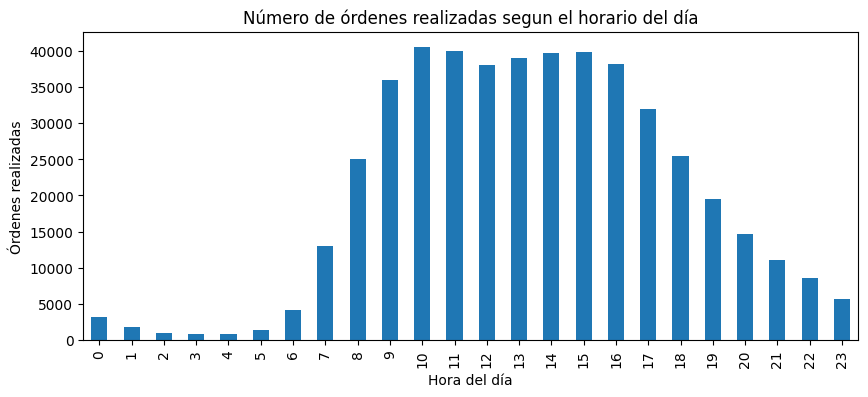

In [37]:
#df_orders.plot(x = "order_hour_of_day", y = 'user_id', kind = "bar", title = "Número de personas que hacen un pedido segun la hora del día", xlabel = "Hora del día", ylabel = "Nro. personas")

ordenes_por_dia = df_orders.groupby("order_hour_of_day")["user_id"].count().reset_index()
print(ordenes_por_dia)
print()
ordenes_por_dia.plot(x = "order_hour_of_day",
                    y = "user_id",
                    kind = "bar",
                    title = "Número de órdenes realizadas segun el horario del día",
                    xlabel = "Hora del día",
                    ylabel = "Órdenes realizadas",
                    figsize = [10,4],
                    legend = False)
plt.show()

Se puede observar que los horarios en los que se realizan más pedidos son entre las 9:00 y las 16:00, lo cual tiene sentido ya que son los horruos en los que la gente suele realizar sus actividades cotidianas. Los horarios en los que se realizan menos pedidos son entre las 0:00 y las 6:00, lo cual es lógico ya que a esas horas la gente suele estar durmiendo.

### [A3] ¿Qué día de la semana compran víveres las personas?

   order_dow  user_id
0          0    84090
1          1    82185
2          2    65833
3          3    60897
4          4    59810
5          5    63488
6          6    62649


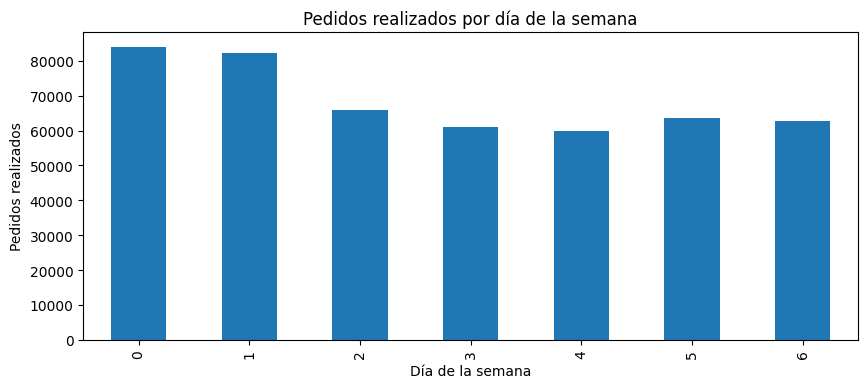

In [38]:
#df_orders.plot(x = "order_dow", kind = "bar", title = "Número de personas que hacen un pedido segun el día de la semana", xlabel = "Día de la semana")

ordenes_dias_de_la_semana = df_orders.groupby("order_dow")["user_id"].count().reset_index()
print(ordenes_dias_de_la_semana)
ordenes_dias_de_la_semana.plot(x = "order_dow",
                              y = "user_id",
                              kind = "bar",
                              title = "Pedidos realizados por día de la semana",
                              xlabel = "Día de la semana",
                              ylabel = "Pedidos realizados",
                              figsize = [10,4],
                              legend = False)
#plt.legend(["Domingo","Lunes","Martes","Miércoles","Jueves","Viernes","Sábado"])
plt.show()

Se observa que la distribución de los pedidos realizados según el día de la semana no varia demasiado segun el día realizado. Sin embargo, se nota que hay un ligero aumento en los pedidos realizados los días domingo y lunes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

    days_since_prior_order  user_id
0                      0.0     9589
1                      1.0    20179
2                      2.0    27138
3                      3.0    30224
4                      4.0    31006
5                      5.0    30096
6                      6.0    33930
7                      7.0    44577
8                      8.0    25361
9                      9.0    16753
10                    10.0    13309
11                    11.0    11467
12                    12.0    10658
13                    13.0    11737
14                    14.0    13992
15                    15.0     9416
16                    16.0     6587
17                    17.0     5498
18                    18.0     4971
19                    19.0     4939
20                    20.0     5302
21                    21.0     6448
22                    22.0     4514
23                    23.0     3337
24                    24.0     3015
25                    25.0     2711
26                    26.0  

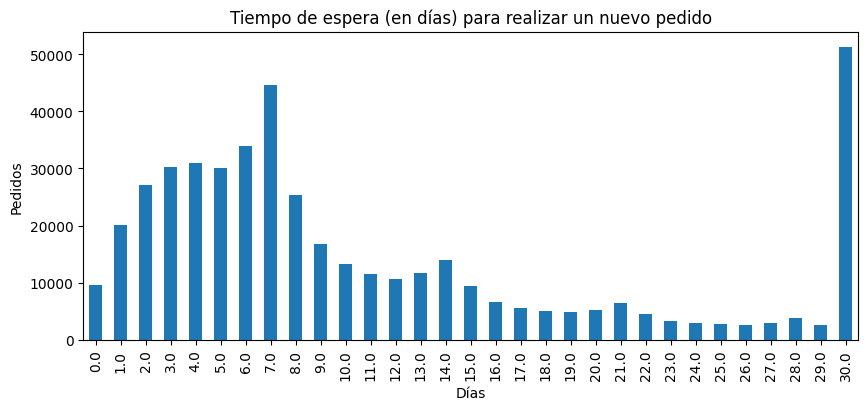

In [39]:
#df_orders.plot(x = "days_since_prior_order", kind = "bar", title = "Días de espera hasta el siguiente pedido realizado", xlab = "Dias")

tiempo_espera_pedidos = df_orders.groupby("days_since_prior_order")["user_id"].count().reset_index()
print(tiempo_espera_pedidos)
tiempo_espera_pedidos.plot(x = "days_since_prior_order",
                          y = "user_id",
                          kind = "bar",
                          title = "Tiempo de espera (en días) para realizar un nuevo pedido",
                          xlabel = "Días",
                          ylabel = "Pedidos",
                          figsize = [10,4],
                          legend = False)
plt.show()

Se observa que las personas suelen realizar su siguiente pedido, ya sea entre dos y ocho días posterior a su última compra, o hasta 30 días despues de haber realizado el último pedido. 

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

<AxesSubplot:title={'center':'Comparativa entre las órdenes realizadas el miércoles y el sábado'}, xlabel='Día', ylabel='Órdenes realizadas'>

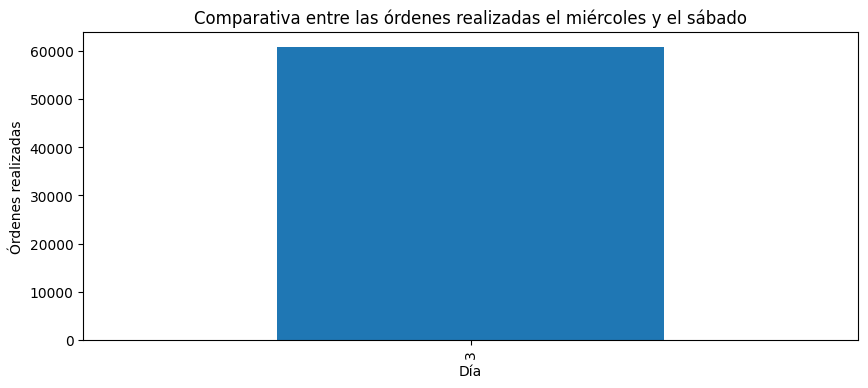

In [40]:
#ordenes_miercoles = df_orders[df_orders["order_dow"]==3]
ordenes_miercoles = ordenes_dias_de_la_semana[ordenes_dias_de_la_semana["order_dow"]==3].reset_index()
ordenes_miercoles
ordenes_miercoles.plot(x = "order_dow",
                      y = "user_id",
                      kind = "bar",
                      title = "Comparativa entre las órdenes realizadas el miércoles y el sábado",
                      xlabel = "Día",
                      ylabel = "Órdenes realizadas",
                      figsize = [10,4],
                      legend = False)

<AxesSubplot:title={'center':'Comparativa entre las órdenes realizadas el miércoles y el sábado'}, xlabel='Día', ylabel='Órdenes realizadas'>

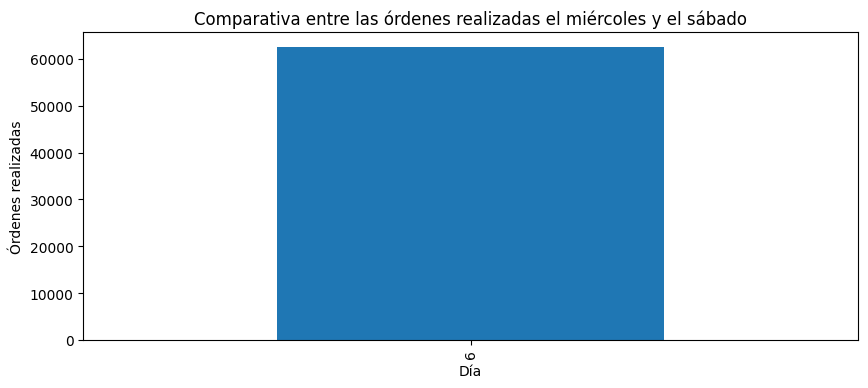

In [41]:
#ordenes_sabado = df_orders[df_orders["order_dow"]==6]
ordenes_sabado = ordenes_dias_de_la_semana[ordenes_dias_de_la_semana["order_dow"]==6].reset_index()
ordenes_sabado
ordenes_dias_de_la_semana[ordenes_dias_de_la_semana["order_dow"]==6].plot(x = "order_dow",
                      y = "user_id",
                      kind = "bar",
                      title = "Comparativa entre las órdenes realizadas el miércoles y el sábado",
                      xlabel = "Día",
                      ylabel = "Órdenes realizadas",
                      figsize = [10,4],
                      legend = False)

order_dow             3     6
order_hour_of_day            
0                   373   464
1                   215   254
2                   106   177
3                   101   125
4                   108   118
5                   170   161
6                   643   451
7                  1732  1619
8                  3125  3246
9                  4490  4311
10                 5026  4919
11                 5004  5116
12                 4688  5132
13                 4674  5323
14                 4774  5375
15                 5163  5188
16                 4976  5029
17                 4175  4295
18                 3463  3338
19                 2652  2610
20                 1917  1847
21                 1450  1473
22                 1154  1185
23                  718   893


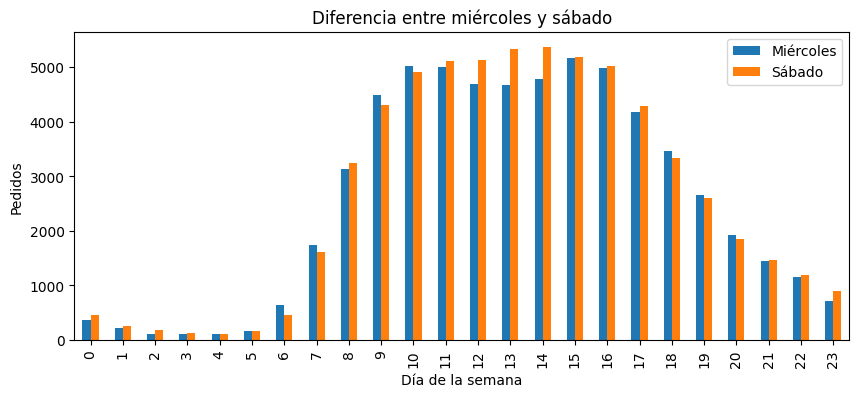

In [42]:
#ordenes_miercoles.plot(x = "order_hour_of_day", kind = "bar", title = "Distribución de los pedidos del miércoles segun la hora del día", xlab = "Hora del día")
tabla_miercoles_y_sabado = df_orders[df_orders["order_dow"].isin([3,6])][["order_dow","order_hour_of_day","user_id"]]
tabla_dinamica_miercoles_y_sabado = tabla_miercoles_y_sabado.pivot_table(index = "order_hour_of_day",
                                     columns = "order_dow",
                                     values = "user_id",
                                     aggfunc = "count")
print(tabla_dinamica_miercoles_y_sabado)
tabla_dinamica_miercoles_y_sabado.plot(kind = "bar",
                                           title = "Diferencia entre miércoles y sábado",
                                           xlabel = "Día de la semana",
                                           ylabel = "Pedidos",
                                           figsize = [10,4])
plt.legend(["Miércoles","Sábado"])
plt.show()

In [43]:
#ordenes_sabado.plot(x = "order_hour_of_day", kind = "bar", title = "Distribución de los pedidos del sábado segun la hora del día", xlab = "Hora del día")
#plt.show()

Se observa que los pedidos de los días miercoles y sábado siguen una distribución similar, donde las horas con mayores pedidos son entre las 9:00 y las 17:00. Sin embargo, es importante resaltar que en los días miércoles los pedidos superan a los de los sábados en la mayoría de los horarios donde no se realizan tantos pedidos, mientras que en los días sábados los pedidos superan a los de los miércoles en la mayoría de los horarios donde se realizan mayor número de pedidos. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [43]:
#ordenes_por_cliente = df_orders["order_number"]
#ordenes_por_cliente
distribucion_numero_de_pedidos_por_cliente = df_orders.groupby("user_id")["order_id"].count()
distribucion_numero_de_pedidos_por_cliente

user_id
2         2
4         2
5         1
6         2
7         2
         ..
206203    1
206206    7
206207    5
206208    9
206209    2
Name: order_id, Length: 157437, dtype: int64

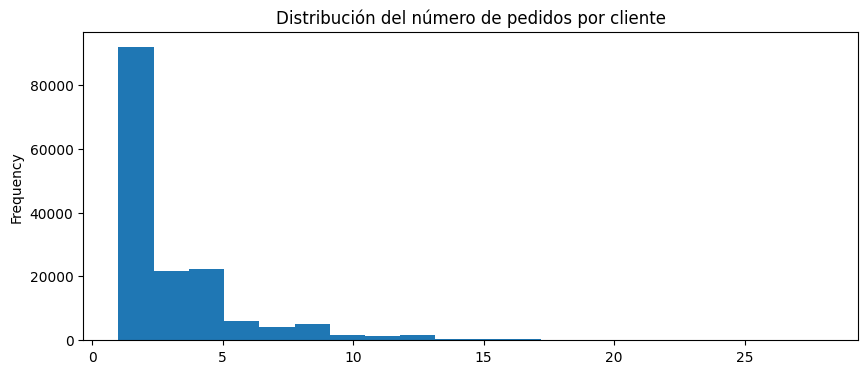

In [44]:
distribucion_numero_de_pedidos_por_cliente.plot(kind = "hist",
                                               title = "Distribución del número de pedidos por cliente",
                                               bins = 20,
                                               figsize = [10,4])
plt.show()

Podemos observar que la mayoría de los clientes no realizan más de cinco pedidos. Hay una pequeña fracción de clientes que realizan entre seis y diez pedidos. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [45]:
productos_populares = df_order_products.merge(df_products, on = "product_id", how = "inner")
productos_populares

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,147172,11440,7,1,CHICKEN BREAST TENDERS BREADED,129,1
2,3341719,11440,4,1,CHICKEN BREAST TENDERS BREADED,129,1
3,1938779,11440,8,1,CHICKEN BREAST TENDERS BREADED,129,1
4,1728338,11440,23,0,CHICKEN BREAST TENDERS BREADED,129,1
...,...,...,...,...,...,...,...
4545002,267402,45226,14,0,SWEET TERIYAKI CHICKEN OVEN SAUCE,5,13
4545003,2621676,25201,10,0,CRISP WATERS CANDLE SCENTS,101,17
4545004,937623,49153,2,0,SHINE COLLECTION BRILLANCE SHAMPOO,22,11
4545005,532895,8182,1,0,TOTAL MINT STRIPE GEL TOOTHPASTE,20,11


In [46]:
mejores_productos = productos_populares.groupby(["product_id","product_name"])["order_id"].count().sort_values(ascending=False)
mejores_20_productos = mejores_productos.head(20)
mejores_20_productos

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: order_id, dtype: int64

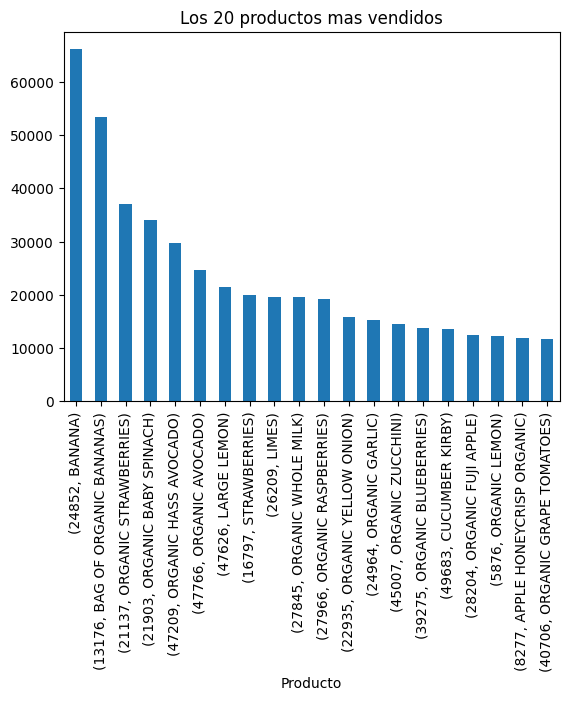

In [47]:
mejores_20_productos.plot(kind="bar",title="Los 20 productos mas vendidos",xlabel="Producto")
plt.show()

Los veinte prodictos más comprdos por los clientes son prácticamente todos frutas y verduras. Esto es muy lógico ya que son productos que se utilizan en todo momento del día, ya sea como un snack o desayuno, como para elaborar platillos más complejos.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [48]:
articulos_y_pedidos = df_orders.merge(df_order_products, on = "order_id", how = "outer")
articulos_y_pedidos

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30.0,19048.0,1.0,1.0
1,1515936,183418,11,6,13,30.0,47766.0,3.0,1.0
2,1515936,183418,11,6,13,30.0,45066.0,9.0,0.0
3,1515936,183418,11,6,13,30.0,24082.0,11.0,0.0
4,1515936,183418,11,6,13,30.0,24363.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...
4573908,2071924,1730,18,1,14,15.0,1503.0,17.0,0.0
4573909,2071924,1730,18,1,14,15.0,4778.0,12.0,1.0
4573910,2071924,1730,18,1,14,15.0,11512.0,1.0,1.0
4573911,2071924,1730,18,1,14,15.0,4920.0,6.0,1.0


In [49]:
#articulos_adquiridos_por_pedido = articulos_y_pedidos.groupby("user_id")["add_to_cart_order"].max().sort_values(ascending=False)
#articulos_adquiridos_por_pedido
articulos_adquiridos_por_pedido = articulos_y_pedidos.groupby("order_id")["product_id"].count()
articulos_adquiridos_por_pedido

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421053     9
3421058     0
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 478952, dtype: int64

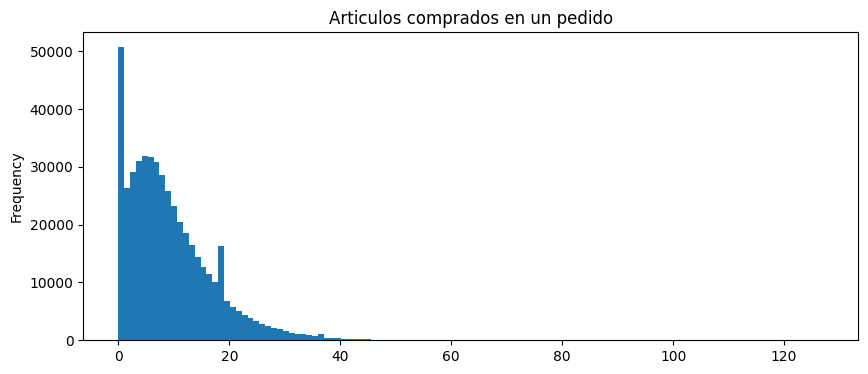

In [50]:
#articulos_adquiridos_por_pedido.plot(kind="bar",title="Número de artículos adquiridos por pedido",xlab="Número de artículos")

articulos_adquiridos_por_pedido.plot(kind = "hist",
                                    title = "Articulos comprados en un pedido",
                                    figsize = [10,4],
                                    bins = 120)
plt.show()

Podemos observar que los pedidos realizados oscilan entre uno y cuarenta y cuatro artículos. Por lo general, las personas ordenan de uno a diez artículos por pedido. A medida que aumentan los artículos por pedido, disminuye la cantidad de ordenes con dichos artículos comprados. Cabe resaltar que hay un aumento en los pedidos de 18 artículos en comparación con los valores cercanos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [51]:
productos_reordenados_populares = productos_populares[productos_populares["reordered"]==1].groupby(["product_id","product_name"])["order_id"].count().sort_values(ascending = False)
productos_reordenados_populares

product_id  product_name                                 
24852       BANANA                                           55763
13176       BAG OF ORGANIC BANANAS                           44450
21137       ORGANIC STRAWBERRIES                             28639
21903       ORGANIC BABY SPINACH                             26233
47209       ORGANIC HASS AVOCADO                             23629
                                                             ...  
7092        MELATONIN NUTRASPRAY SUBLINGUAL ORANGE FLAVOR        1
21003       WHITE CHOCOLATE MACADAMIA COFFEE CREAMER             1
32856       CRAB RANGOON                                         1
42727       CHOCOLATE LOVERS CHIPS DELUXE COOKIES                1
24091       GARLIC MILL SPICES                                   1
Name: order_id, Length: 36228, dtype: int64

In [52]:
productos_reordenados_populares_20 = productos_reordenados_populares.head(20)
productos_reordenados_populares_20

product_id  product_name            
24852       BANANA                      55763
13176       BAG OF ORGANIC BANANAS      44450
21137       ORGANIC STRAWBERRIES        28639
21903       ORGANIC BABY SPINACH        26233
47209       ORGANIC HASS AVOCADO        23629
47766       ORGANIC AVOCADO             18743
27845       ORGANIC WHOLE MILK          16251
47626       LARGE LEMON                 15044
27966       ORGANIC RASPBERRIES         14748
16797       STRAWBERRIES                13945
26209       LIMES                       13327
22935       ORGANIC YELLOW ONION        11145
24964       ORGANIC GARLIC              10411
45007       ORGANIC ZUCCHINI            10076
49683       CUCUMBER KIRBY               9538
28204       ORGANIC FUJI APPLE           8989
8277        APPLE HONEYCRISP ORGANIC     8836
39275       ORGANIC BLUEBERRIES          8799
5876        ORGANIC LEMON                8412
49235       ORGANIC HALF & HALF          8389
Name: order_id, dtype: int64

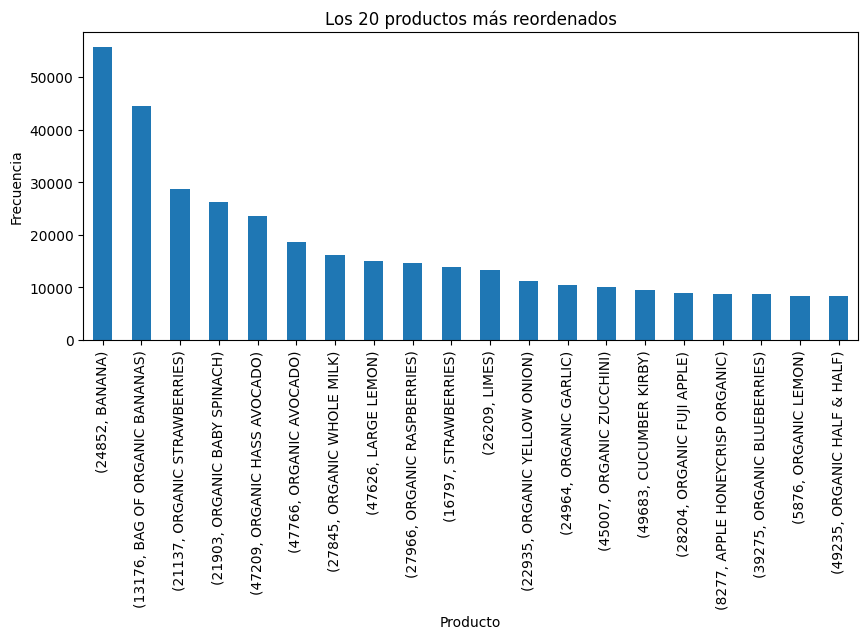

In [53]:
#productos_reordenados_populares_20.plot(kind="bar",title="Los 20 productos más reordenados",xlab="Producto")
productos_reordenados_populares_20.plot(x = "product_name",
                                       kind = "bar",
                                       title = "Los 20 productos más reordenados",
                                       xlabel = "Producto",
                                        ylabel = "Frecuencia",
                                       figsize = [10,4])
plt.show()

In [54]:
#(products_reordered.sort_values(ascending = False).head(20)).plot(kind = 'bar',
#                                                        title = '20 Productos que vuelven a pedirse con mayor frecuencia',
 #                                                       xlabel = 'Productos',
  #                                                      ylabel = 'Frecuencia',
   #                                                    figsize = [10, 2],
    #                                                    color = 'darkred')

Se puede observar que los veinte productos que la gente suele comprar más de una vez son todos frutas y verduras, lo cual es lógico dado el poco tiempo de duración que tienen y la frecuencia con la que la gente los usa para cocinar. Además, se puede observar que los productos coinciden con los más comprados.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [55]:
proporcion_productos_populares = productos_populares.groupby(["product_id","product_name"])["reordered"].mean()
proporcion_productos_populares

product_id  product_name                                                     
1           CHOCOLATE SANDWICH COOKIES                                           0.564286
2           ALL-SEASONS SALT                                                     0.000000
3           ROBUST GOLDEN UNSWEETENED OOLONG TEA                                 0.738095
4           SMART ONES CLASSIC FAVORITES MINI RIGATONI WITH VODKA CREAM SAUCE    0.510204
7           PURE COCONUT WATER WITH ORANGE                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

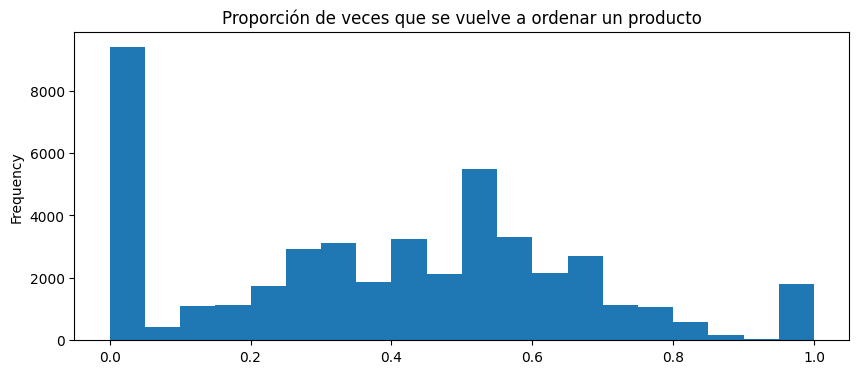

In [56]:
proporcion_productos_populares.plot(kind = "hist",
                                    figsize = [10,4], 
                                    title = "Proporción de veces que se vuelve a ordenar un producto",
                                    bins = 20)
plt.show()

La mayoria de los productos tienen una proporcion de reordenamiento de menos del 5%. Cabe resaltar que si hay un alto porcentaje de productos reordenados, aunque estos se distribuyen en un rango entre el 25% y el 75%.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [57]:
clientes_y_productos_populares = productos_populares.merge(df_orders, on = "order_id", how="outer")
clientes_y_productos_populares

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440.0,17.0,0.0,CHICKEN BREAST TENDERS BREADED,129.0,1.0,58454,25,0,15,8.0
1,2141543,24561.0,13.0,1.0,ORGANIC CHEESE FROZEN PIZZA,79.0,1.0,58454,25,0,15,8.0
2,2141543,13176.0,2.0,1.0,BAG OF ORGANIC BANANAS,24.0,4.0,58454,25,0,15,8.0
3,2141543,31869.0,15.0,1.0,ORGANIC EDAMAME,116.0,1.0,58454,25,0,15,8.0
4,2141543,16759.0,5.0,1.0,ORGANIC CARROT BUNCH,83.0,4.0,58454,25,0,15,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4573908,3129486,NaN,NaN,NaN,NaN,NaN,NaN,189202,24,0,9,7.0
4573909,2563672,NaN,NaN,NaN,NaN,NaN,NaN,112284,5,2,18,30.0
4573910,1631361,NaN,NaN,NaN,NaN,NaN,NaN,164034,35,5,17,13.0
4573911,2607577,NaN,NaN,NaN,NaN,NaN,NaN,167381,24,0,18,7.0


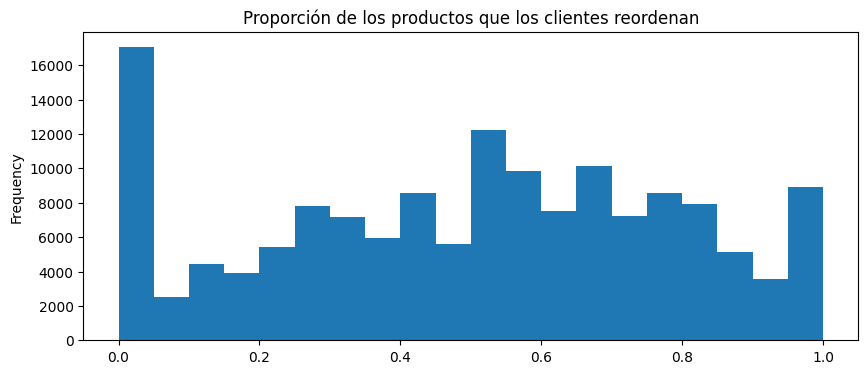

In [58]:
proporcion_productos_reordenados_por_clientes = clientes_y_productos_populares.groupby(["user_id"])["reordered"].mean()
proporcion_productos_reordenados_por_clientes.plot(kind = "hist",
                                                   bins = 20,
                                                   title = "Proporción de los productos que los clientes reordenan",
                                                   figsize = [10,4])
plt.show()

Se puede observar que la proporcion de productos reordenados por clos clientes varia mucho. Resalta que la mayoria de los clientes reordena los productos menos del 5% de las veces que realiza un nuevo pedido. Auque tambien cabe aclarar que muchos clientes reordenan entre el 50% y 75% de los productos en una nueva orden. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [59]:
productos_primero_comprados = clientes_y_productos_populares[clientes_y_productos_populares["add_to_cart_order"]==1].groupby(["user_id","product_name"])["add_to_cart_order"].sum().sort_values(ascending = False)
productos_primero_comprados

user_id  product_name                      
139660   ORIGINAL PURE CREAMY ALMOND MILK      17.0
39993    DRINKING WATER                        17.0
84478    VODKA                                 14.0
142977   WALNUT HALVES & PIECES                14.0
100935   TOTAL 0% GREEK YOGURT                 14.0
                                               ... 
72759    GRENACHE BLANC                         1.0
         GLUTEN FREE MATZO-STYLE SQUARES        1.0
         FRONTIER WHISKEY                       1.0
         CURATE CHERRY LIME SPARKLING WATER     1.0
206209   FRENCH LOAF                            1.0
Name: add_to_cart_order, Length: 389636, dtype: float64

In [60]:
principales_20_primeros_productos_comprados = productos_primero_comprados.head(20)
principales_20_primeros_productos_comprados

user_id  product_name                    
139660   ORIGINAL PURE CREAMY ALMOND MILK    17.0
39993    DRINKING WATER                      17.0
84478    VODKA                               14.0
142977   WALNUT HALVES & PIECES              14.0
100935   TOTAL 0% GREEK YOGURT               14.0
33799    ICE                                 14.0
12486    SODA                                14.0
195804   BANANA                              13.0
126311   SPRING WATER                        13.0
46328    REAL2 ALKALIZED WATER 500 ML        13.0
84722    BAG OF ORGANIC BANANAS              12.0
53684    ITALIAN SPARKLING MINERAL WATER     12.0
69922    ICE BAG                             12.0
189766   ICE                                 12.0
79973    VODKA                               12.0
72559    EXTRA FANCY UNSALTED MIXED NUTS     12.0
137357   BANANA                              12.0
194931   BANANA                              11.0
127577   WATERMELON CHUNKS                   11.0
120897  

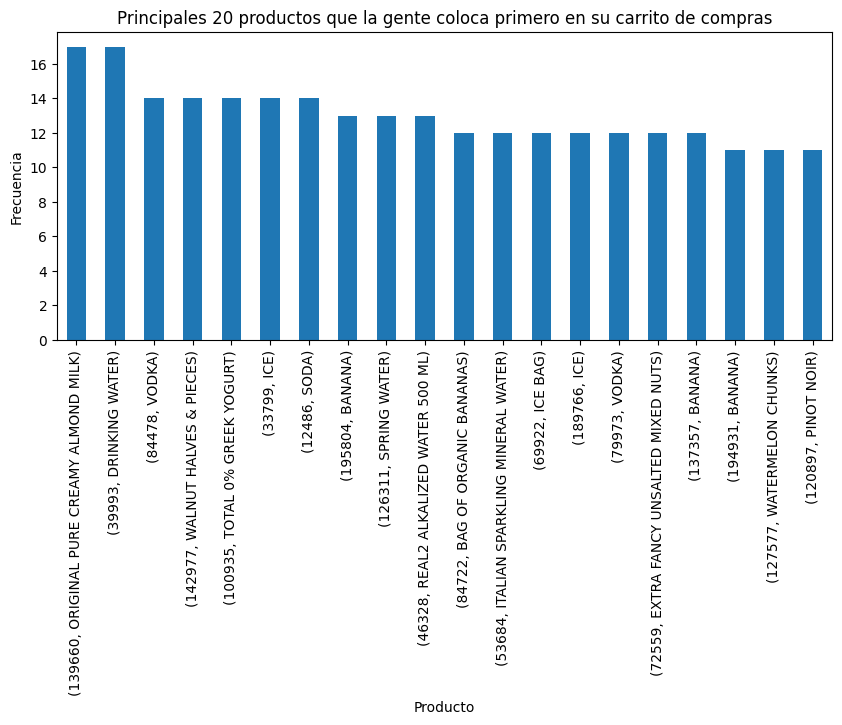

In [61]:
#principales_20_primeros_productos_comprados.plot(kind="bar",title="Primeros 20 productos que los usuarios agregan a su carrito de compra", xlab="Producto")
principales_20_primeros_productos_comprados.plot(kind = "bar",
                                                x = "product_name",
                                                title = "Principales 20 productos que la gente coloca primero en su carrito de compras",
                                                xlabel = "Producto",
                                                ylabel = "Frecuencia",
                                                figsize = [10,4])
plt.show()

Los primeros productos que la gente suele agregar a sus carritos de compra son muy variados. Además, no hay una gran difeencia entre el producto más agregado y los subsecuentes, por lo que es dificil deducir a que se deba el que un cliente escoja dichos productos primero. Por otro lado, podemos observar que hay productos que se repiten (se llaman igual pero poseen un número de identificación diferente), como las bananas, el hielo o el vodka.

### Conclusion general del proyecto: